#### I've provided with the NYC Taxi Trip Dataset. This dataset contains information about the taxi trips that took place in different parts of New York City and how much time did that trips take to complete.


In this project, the following are the tasks I have to complete and submit

1. Choose the most suitable evaluation metric and state why I chose it.
2. Build a benchmark model for the given dataset.
3. Build a K-Nearest neighbours’ model for the given dataset and find the best value of K.
4. Build a Linear model for the given dataset with regularisation. Attempt to interpret the variable coefficients of the Linear    Model.

5. Plot the following Bar plots:

    -Train score of all the above models.
    
    -Test (not validation!) score of all the above models.
    
    -Attempt to explain the observations from the plots (optional)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.__version__, np.__version__

('1.2.4', '1.20.1')

In [3]:
import warnings
warnings.filterwarnings('ignore')

### importing dataset

In [4]:
data = pd.read_csv('EDA_NYC_Taxi .zip')

since KNN model doesn't work well with a large dataset

In [5]:
data = data.iloc[0:50000,]

In [6]:
data.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,1.534440,1.666700,-73.973444,40.750844,-73.973543,40.751698,9.815393e+02
std,0.498817,1.313425,0.038120,0.028125,0.035863,0.032293,9.190114e+03
min,1.000000,0.000000,-74.181648,40.298828,-74.366119,40.298828,2.000000e+00
25%,1.000000,1.000000,-73.991859,40.737209,-73.991425,40.736080,3.970000e+02
50%,2.000000,1.000000,-73.981766,40.754158,-73.979843,40.754385,6.610000e+02
75%,2.000000,2.000000,-73.967377,40.768337,-73.963371,40.769730,1.070000e+03
max,2.000000,6.000000,-73.653358,41.106907,-73.344200,41.106907,1.939736e+06


In [7]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [8]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [9]:
data.shape

(50000, 11)

In [10]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [11]:
data['trip_duration'] = data['trip_duration'].apply(lambda x: x/3600)


In [12]:
np.sum(pd.isnull(data))

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## TASK 1

The most suitable evaluation metric for me is Root Mean Squared Error(RMSE) because RMSE is an extension of the mean squared error. The square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.
Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE is most useful when large errors are particularly undesirable.

## TASK 2: Benchmark Model
#### Shuffling and creating train and test set

In [13]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [14]:
data.shape[0]

50000

In [15]:
train.shape

(33666, 11)

#### Simple Mean (mean of trip_duration)

In [16]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()

In [17]:
#calculating RMSE
from sklearn.metrics import mean_squared_error as MSE

simple_mean_error = np.sqrt(MSE(test['trip_duration'] , test['simple_mean']))
simple_mean_error

0.8215135411141647

#### Mean trip_duration with respect to vendor_id

In [18]:
vend_id = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
vend_id

,trip_duration
vendor_id,
1,0.265000
2,0.292327


In [19]:
# initializing new column to zero
test['vendor_id_mean'] = 0

# For every unique entry in vendor_id
for i in train['vendor_id'].unique():
  # Assign the mean value corresponding to unique entry
  test['vendor_id_mean'][test['trip_duration'] == str(i)] = train['trip_duration'][train['vendor_id'] == str(i)].mean()

In [20]:
#calculating RMSE
vendor_id_error = np.sqrt(MSE(test['trip_duration'] , test['vendor_id_mean'] ))
vendor_id_error

0.8608422627335721

#### Mean with respect to passenger_count

In [21]:
p_count = pd.pivot_table(train, values = 'trip_duration', index = ['passenger_count'], aggfunc = np.mean)
p_count

,trip_duration
passenger_count,
0,0.186574
1,0.279315
2,0.269554
3,0.310019
4,0.285447
5,0.292101
6,0.273302


In [22]:
# Initializing empty column
test['p_count_mean'] = 0

# For every unique entry in passenger_count
for i in train['passenger_count'].unique():
  # calculate and assign mean corresponding to the uniques entries
  test['p_count_mean'][test['passenger_count'] == str(i)] = train['trip_duration'][train['passenger_count'] == str(i)].mean()

In [23]:
#calculating mean absolute error
p_count_error = np.sqrt(MSE(test['trip_duration'] , test['p_count_mean'] ))
p_count_error

0.8608422627335721

#### Mean trip_duration with respect to both vendor_id and passenger_count

In [24]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['vendor_id', 'passenger_count'], aggfunc = np.mean)
combo

trip_duration
vendor_id passenger_count               
1         0                     0.186574
          1                     0.266219
          2                     0.259187
          3                     0.266925
          4                     0.253807
          5                     0.266354
          6                     0.251444
2         1                     0.294086
          2                     0.277746
          3                     0.333949
          4                     0.307978
          5                     0.292220
          6                     0.273398

In [25]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s2 = 'vendor_id'
s1 = 'passenger_count'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [26]:
#calculating RMSE
super_mean_error = np.sqrt(MSE(test['trip_duration'] , test['Super_mean'] ))
super_mean_error

0.8608422627335721

### TASK 3: KNN Regression
### Segrigating variables: Independent and Dependent variables

In [27]:
#seperating independent and dependent variables
x = data.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_latitude', 'pickup_longitude', 
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((50000, 2), (50000,))

#### Scalling the data (Using MinMax Scaler)

In [28]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
x = pd.DataFrame(x_scaled)

In [30]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [31]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse


In [32]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating RMSE
test_predict = reg.predict(test_x)
k = np.sqrt(mse(test_predict, test_y))
print('Test RMSE    ', k )

Test RMSE     0.8134211414258413


In [33]:
def Elbow(K):
  #initiating empty list
    test_rmse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending rmse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = np.sqrt(mse(tmp,test_y))
        test_rmse.append(tmp)
    
    return test_rmse

In [34]:
#Defining K range
k = range(1, 50)

In [35]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

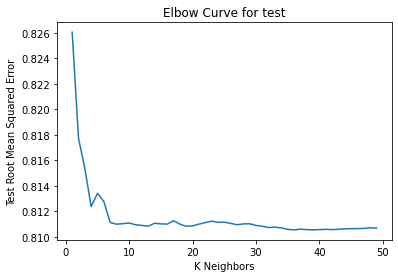

In [36]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Root Mean Squared Error')
plt.title('Elbow Curve for test')

In [37]:
from sklearn import neighbors

In [38]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_x, train_y)  #fit the model
    pred=model.predict(test_x) #make prediction on test set
    error = np.sqrt(mse(test_y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k = ' , K , 'is:', error)

RMSE value for k =  1 is: 0.8260601842069976
RMSE value for k =  2 is: 0.8177438700973491
RMSE value for k =  3 is: 0.8153502866387002
RMSE value for k =  4 is: 0.8123717016295008
RMSE value for k =  5 is: 0.8134211414258413
RMSE value for k =  6 is: 0.8127584697491657
RMSE value for k =  7 is: 0.8111230349480781
RMSE value for k =  8 is: 0.810989477578445
RMSE value for k =  9 is: 0.8110314874495215
RMSE value for k =  10 is: 0.8110790558948212
RMSE value for k =  11 is: 0.8109475771863076
RMSE value for k =  12 is: 0.8108894056310078
RMSE value for k =  13 is: 0.8108363137156167
RMSE value for k =  14 is: 0.8110644950788055
RMSE value for k =  15 is: 0.8110147617157135
RMSE value for k =  16 is: 0.8109964545314082
RMSE value for k =  17 is: 0.8112588032394498
RMSE value for k =  18 is: 0.810991626694192
RMSE value for k =  19 is: 0.8108257851685253
RMSE value for k =  20 is: 0.8108540211996345


In [39]:
reg = KNN(n_neighbors = 13) #  Since k =13 have the least error so best value of k is 13

reg.fit(train_x, train_y)

test_predict = reg.predict(test_x)
k = np.sqrt(MSE(test_predict, test_y))
print('Test RMSE', k)

Test RMSE 0.8108363137156167


In [40]:
knn_train_score = reg.score(train_x, train_y)
knn_train_score = knn_train_score*100
knn_train_score

-0.02390285733937514

In [41]:
knn_test_score = reg.score(test_x, test_y)
knn_test_score = knn_test_score*100
knn_test_score

0.05820073058753206

## TASK 4: Linear Regression

In [42]:
#importing Linear Regression
from sklearn.linear_model import LinearRegression as LR

In [43]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [44]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = np.sqrt(mse(train_predict, train_y))
print('Training Root Mean Squared Error', k )

Training Root Mean Squared Error 2.910216638131225


In [45]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = np.sqrt(mse(test_predict, test_y))
print('Test Root Mean Squared Error ', k )

Test Root Mean Squared Error  0.8109083118493766


#### Parameters of Linear Regression

In [46]:
lr.coef_

array([ 0.0290855 , -0.00440946])

#### Plotting the variable coefficients

Text(0.5, 1.0, 'Coefficient plot')

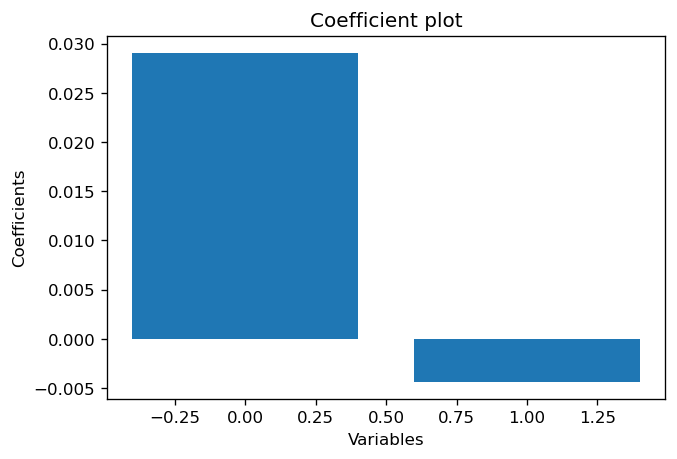

In [47]:
plt.figure(dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [48]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
10762,0.392222,0.261082,0.131140
47278,0.157222,0.261082,-0.103860
14909,0.426944,0.261082,0.165863
13607,0.122500,0.291637,-0.169137
12336,0.231944,0.262552,-0.030607


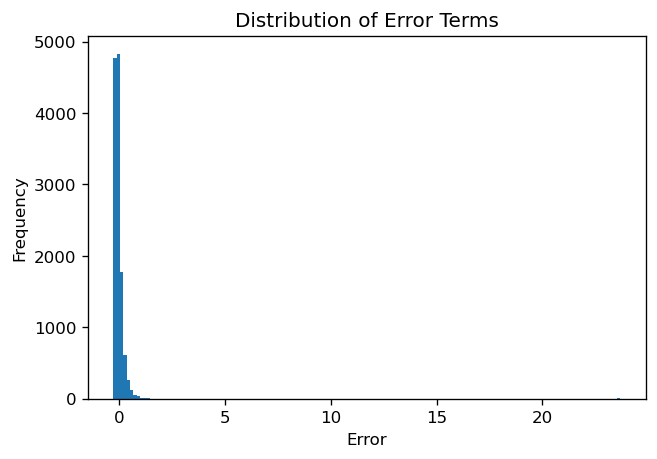

In [49]:
# Histogram for distribution
plt.figure(dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

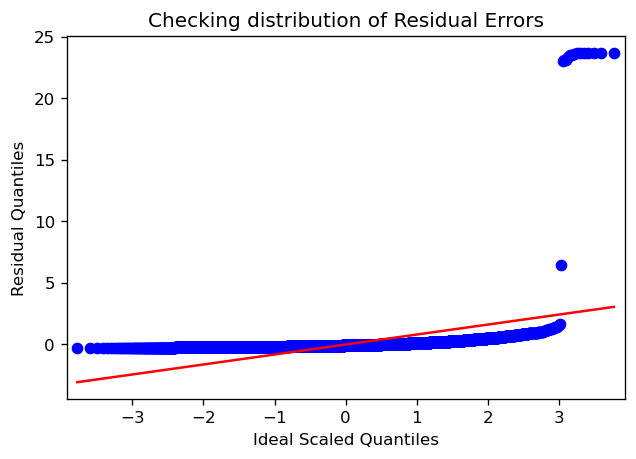

In [50]:
from statsmodels.graphics.gofplots import qqplot  # importing the QQ-plot from the from the statsmodels

fig, ax = plt.subplots(dpi = 120)  ## Plotting the QQ plot
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [51]:
linear_train_score = lr.score(train_x, train_y)
linear_train_score = linear_train_score*100
linear_train_score

0.0024003865604971253

In [52]:
linear_test_score = lr.score(test_x, test_y)
linear_test_score = linear_test_score*100
linear_test_score

0.04045129737241249

# TASK 5: Plotting Bar Plot

#### -Train score of all the above models.

In [53]:
knn_train_score, linear_train_score

(-0.02390285733937514, 0.0024003865604971253)

In [54]:
from pandas import DataFrame

data = pd.DataFrame(data)

In [55]:
train_score= [knn_train_score, linear_train_score]
test_score=[knn_test_score, linear_test_score,]

col={'Train score':train_score,'Test core':test_score}
models=['KNN','LR']
df=DataFrame(data=col,index=models)
df

,Train score,Test core
KNN,-0.023903,0.058201
LR,0.002400,0.040451


<AxesSubplot:>

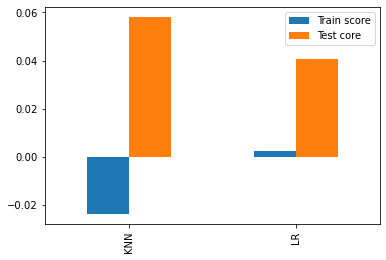

In [56]:
df.plot(kind='bar')

#### -Test (not validation!) score of all the above models.

In [57]:
knn_test_score, linear_test_score, simple_mean_error, p_count_error, super_mean_error

(0.05820073058753206,
 0.04045129737241249,
 0.8215135411141647,
 0.8608422627335721,
 0.8608422627335721)

In [58]:
x2 = ['KNN', 'LR', 'SimpleME', 'PassengerME', 'SuperME']
y2 = [0.05820073058753206,0.04045129737241249,0.8215135411141647,0.8608422627335721,0.8608422627335721]

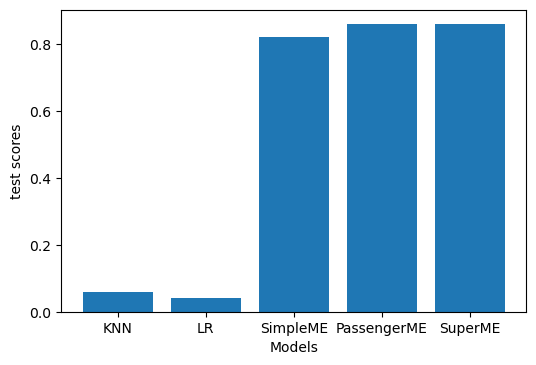

In [59]:
plt.figure(dpi = 100)
plt.bar(x2, y2)
plt.xlabel("Models")
plt.ylabel("test scores")
plt.show()

From the above test scores I observe that Linear Model and KNN (when k=13) is performed better than other models.
I would prefer Linear Model for this dataset because it's test score is lesser than KNN.